# Refined Stratified Sampling Example 5
Author: Mohit S. Chauhan Date: Jan 25, 2019

In this example, Stratified sampling is used to generate samples from Uniform distribution and sample expnsion is done adaptively using Refined Stratified Sampling.

Import the necessary libraries. Here we import standard libraries such as numpy, matplotlib and other necessary library for plots, but also need to import the STS and RSS class from UQpy.

In [1]:
from UQpy.SampleMethods import STS, RSS
from UQpy.Surrogates import Krig
from UQpy.RunModel import RunModel
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.patches as patches
import numpy as np
from scipy.spatial import Delaunay

Using UQpy STS class to generate samples for two random variables, which are uniformly distributed between 0 and 1.

In [2]:
x = STS(dist_name=['uniform', 'uniform'], dist_params=[[0, 1], [0, 1]], nsamples=30, stype='Voronoi')

This plot shows the samples and stratas generated by the STS class.

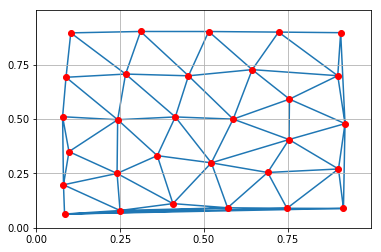

In [3]:
fig2 = plt.figure()
ax = fig2.gca()
ax.set_xticks(np.arange(0, 1, 0.25))
ax.set_yticks(np.arange(0, 1, 0.25))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(x.samples[:, 0], x.samples[:, 1], 'ro')
tri = Delaunay(x.samples)
plt.triplot(x.samples[:, 0], x.samples[:, 1], tri.simplices)
plt.grid()
plt.show()

Krig class defines an object to generate an surrogate model for a given set of data.

In [4]:
K = Krig(reg_model='Linear', corr_model='Exponential', n_opt=10, dimension=2)

RunModel class is used to define an object to evaluate the model at sample points.

In [5]:
rmodel = RunModel(model_script='python_model_function.py')

This figure shows the actual function defined in python model script.

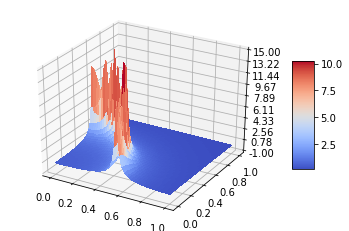

In [6]:
num = 50
x1 = np.linspace(0, 1, num)
x2 = np.linspace(0, 1, num)
x1v, x2v = np.meshgrid(x1, x2)
y_act = np.zeros([num, num])
r1 = RunModel(model_script='python_model_function.py')
for i in range(num):
    for j in range(num):
        r1.run(samples=np.array([[x1v[i, j], x2v[i, j]]]))
        y_act[i, j] = r1.qoi_list[-1]
fig1 = plt.figure()
ax = fig1.gca(projection='3d')
# Plot for estimated values
surf = ax.plot_surface(x1v, x2v, y_act, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim(-1, 15)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Add a color bar which maps values to colors.
fig1.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

Using UQpy RSS class to expand samples generated by STS class. In this example, meta specifies the method used to estimate the gradient and Voronoi cells are used for stratification. 'Delaunay' uses linear interpolation and central difference to estimate gradient.

In [7]:
z = RSS(sample_object=x, run_model_object=rmodel)

In [8]:
z.sample(nsamples=200)

This figure shows the final samples generated using RSS class, where red dots shows the initial samples.

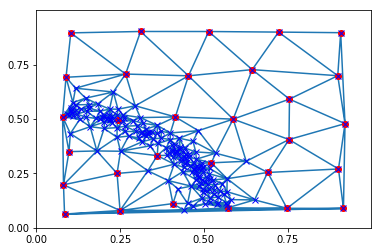

In [9]:
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 1, 0.25))
ax.set_yticks(np.arange(0, 1, 0.25))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(x.samples[:x.nsamples, 0], x.samples[:x.nsamples, 1], 'ro')
plt.plot(z.sample_object.samples[:, 0], z.sample_object.samples[:, 1], 'bx')
tri = Delaunay(z.sample_object.samples)
plt.triplot(z.sample_object.samples[:, 0], z.sample_object.samples[:, 1], tri.simplices)
plt.show()